<h3 style=color:magenta> Pré processamento dos dados</h3>

In [1]:
import pandas as pd

# Importar e processar os dados
df = pd.read_excel('https://raw.githubusercontent.com/AlanaMiranda/backpropagation/main/dadosmamografia.xlsx', header=None)

Xt = df.values[:,:5] # separar dados de entrada

yt = df.values[:,-1] # separar dados de saida
yt = yt.reshape(-1,1)


In [11]:
from backpropagation.preprocessamento import normalizar

(x_treino, y_treino), (x_validacao, y_validacao), (x_teste, y_teste) = normalizar(Xt, yt)

# Fazer transposta nos dados de entrada e saida
x_treino = x_treino.T
x_validacao = x_validacao.T
x_teste = x_teste.T

y_treino = y_treino.T
y_validacao = y_validacao.T
y_teste = y_teste.T

<h3 style=color:magenta> Execução do algoritmo</h3>

In [17]:
# Execução
from backpropagation.rna import backpropagation

treinar = backpropagation(x_treino, y_treino, x_validacao, y_validacao, 15, 'sigmoide')


     Época      Erro_treino             Erro_validacao         
------------------------------------------------------------
     0/2000     0.22704479441677552     0.20321858039480853    
   200/2000     0.07485724576962446     0.05958238541358847    
   400/2000     0.06955008052568554     0.052043933370168376   
   600/2000     0.06645915160725624     0.048476782078158726   
   800/2000     0.0639128829141796      0.046515701557323964   
  1000/2000     0.061537950199637065    0.04491857368465162    
  1200/2000     0.06012314898336292     0.043677178162050356   
  1400/2000     0.05944033799543942     0.04308581407929182    
  1600/2000     0.05905190152593769     0.04288974287040472    
Treinamento finalizado por validação cruzada após 1702 épocas.


<h3 style=color:magenta> Matriz de confusão e outras métricas</h3>

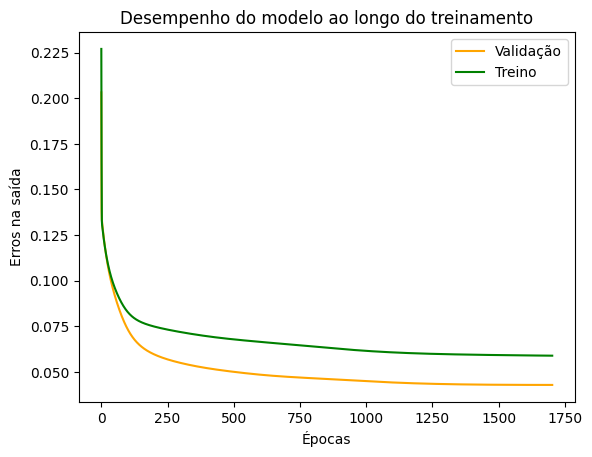

In [18]:
from backpropagation.avaliacoes import grafico

# Gráfico 
grafico(treinar)

In [19]:
from backpropagation.avaliacoes import previsao

# Fazer previsões
y_prev = previsao(treinar, x_teste)

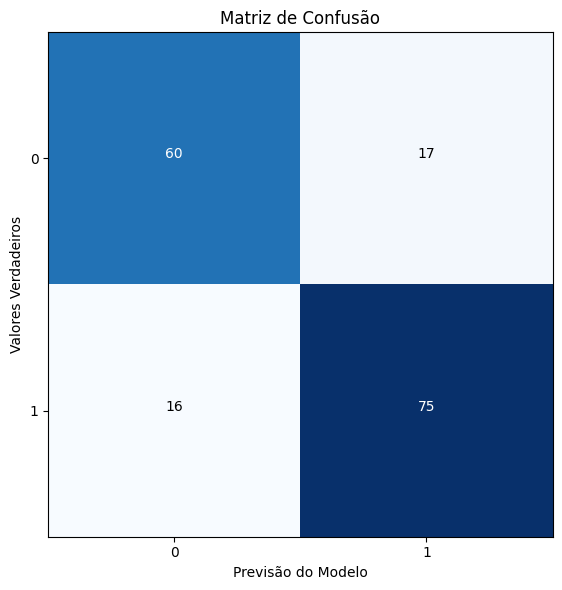

In [20]:
from backpropagation.avaliacoes import matriz_confusao

# Matriz de confusão
matriz_confusao(y_teste, y_prev)


In [21]:
from backpropagation.avaliacoes import acuracia

# Acurácia
acuracia(y_teste, y_prev)


0.8035714285714286

In [24]:
# Verificar pesos inciais
print('======Camada Oculta=====')
print('W2')
print(treinar[2][0])
print('B2')
print(treinar[2][1])

print('======Camada de Saída=====')
print('W1')
print(treinar[2][2])
print('B1')
print(treinar[2][3])


======Camada Oculta=====
W2
[[ 0.5827169  -0.78471906 -0.09157523 -0.16447871  0.01019439  0.41327674
  -0.01184424  0.4243557  -0.88092489  0.03850548  0.57171387  0.56472666
  -0.0806186   0.54566835  0.36171737]
 [ 0.31083905 -0.84312101  0.8573312  -0.66711422 -0.30767264 -0.12331975
   0.972778    0.81466525 -0.94746725 -0.71123843  0.8021581   0.82859087
  -0.53284367  0.83483629 -0.6695319 ]
 [-0.16872566  0.18825862 -0.05539186  0.0344382   0.89774386 -0.97314129
   0.76258311  0.39754362  0.38124878  0.01290766  0.46775038 -0.7281079
  -0.47845961 -0.80904851 -0.77137103]
 [ 0.79936116 -0.97693343 -0.04467159  0.50482576  0.2906684  -0.07038686
  -0.13068376 -0.35307531  0.70086041  0.85901792 -0.08059153 -0.17779817
   0.33457168 -0.70065385  0.42205545]
 [ 0.01817435 -0.40883216 -0.41841939 -0.15599211  0.28765215  0.51742168
  -0.79471047  0.5344126  -0.40645813 -0.67434851 -0.583136    0.50457961
   0.98878353 -0.64425329  0.45650935]]
B2
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [25]:
# verificar pesos finais 
print('======Camada Oculta=====')
print('W2')
print(treinar[3][0])
print('B2')
print(treinar[3][1])

print('======Camada de Saída=====')
print('W1')
print(treinar[3][3])
print('B1')
print(treinar[3][4])

======Camada Oculta=====
W2
[[ 0.80564675 -1.14333379  0.02032583  1.05733815  0.80023949  1.42151437
   0.02704643  1.47628631 -0.45751555  1.60229826  1.0515264   2.23128468
   1.48671385  1.67221783  2.08040911]
 [-0.41616785 -1.39527282  0.35673855 -0.4150095  -0.33073594  0.0536178
   0.13095915  1.08987345 -1.03212875 -0.17607788  0.27634195  1.6146225
   0.09582005  1.0948145  -0.05593123]
 [-1.50724537 -0.21852432 -0.95395691  0.92740661  2.14743677 -1.37480014
  -0.37976555  1.26884071  1.04216691  1.20387037 -0.1717122  -0.22950261
   0.1263976  -0.67511543 -0.14224658]
 [ 0.09553738 -1.41754414 -0.53265551  0.53563045 -0.30733293  0.29743482
  -1.29901236 -0.6542425   0.43496877  1.0827769  -0.82942341  0.21501763
   0.74294105 -0.40918893  0.8746932 ]
 [ 0.21038438 -0.78841697 -0.34520861 -0.33481079 -0.2894873   0.56290149
  -0.47159777  0.10300374 -0.87915545 -0.66911246 -0.35721931  0.42959415
   0.85487337 -0.30459004  0.40752611]]
B2
[[-1.49724617]
 [-1.22799735]
 [-1.